In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [19]:
def plot(axes, x, y, title, label=None, semilog=False):
    f = axes.semilogy if semilog else axes.plot
    f(x, y, linestyle='', marker='.', markersize=6, label=label)
    axes.set_title(title)
    # axes.set_ylabel(title)
    # axes.set_xlabel('Temperatura')


In [20]:
from importlib import reload
try:
    reload(recopilar_data)
except NameError:
    import recopilar_data
    
# data = pd.read_csv('alldata.dat', sep='\s+')
data_raw = pd.read_csv('alldata.dat', sep='\s+')
data_raw['amag'] = abs(data_raw['magnetization'])
data_raw['N'] = data_raw['size']**2
data_raw.head(10)

,size,B,temperature,job,energy,energy^2,magnetization,magnetization^2,aceptados,amag,N
0,40,0.0,2.94,2,-1347.663468,1.822371e+06,-14.225848,22428.021753,0.448086,14.225848,1600
1,40,0.0,2.94,10,-1345.506078,1.816166e+06,0.535509,20068.779271,0.448709,0.535509,1600
2,40,0.0,2.94,9,-1348.083173,1.822863e+06,13.943058,19230.048624,0.448198,13.943058,1600
3,40,0.0,2.94,3,-1348.307102,1.823760e+06,18.236724,21631.483045,0.447750,18.236724,1600
4,40,0.0,2.94,7,-1354.497761,1.840730e+06,30.110685,24728.574536,0.446440,30.110685,1600
5,40,0.0,2.94,5,-1346.484965,1.819129e+06,-11.435701,18780.967370,0.448179,11.435701,1600
6,40,0.0,2.94,4,-1346.314779,1.818169e+06,5.663468,20002.812540,0.448745,5.663468,1600
7,40,0.0,2.94,1,-1348.222649,1.823506e+06,9.527191,19661.953935,0.447648,9.527191,1600
8,40,0.0,2.94,8,-1350.904671,1.831084e+06,19.901472,23388.127959,0.447162,19.901472,1600
9,40,0.0,2.94,6,-1347.570058,1.821839e+06,-10.078695,24339.985925,0.448234,10.078695,1600


<AxesSubplot:>

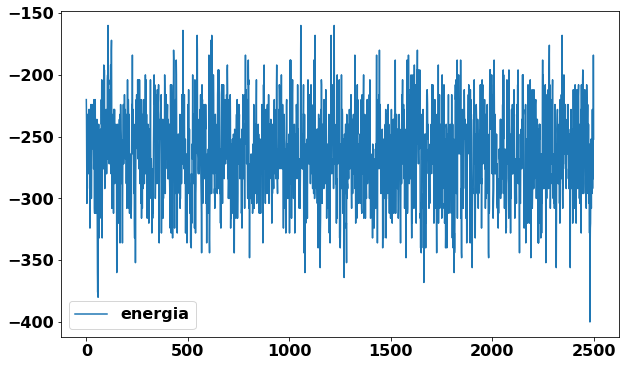

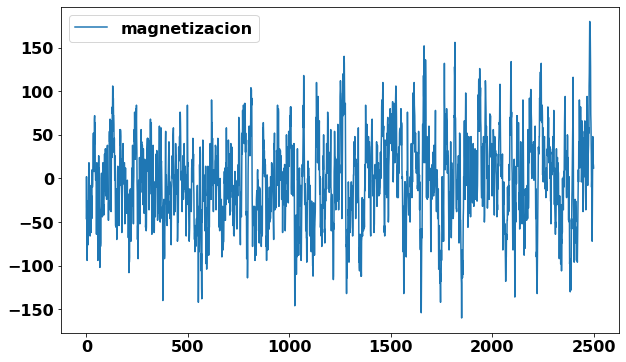

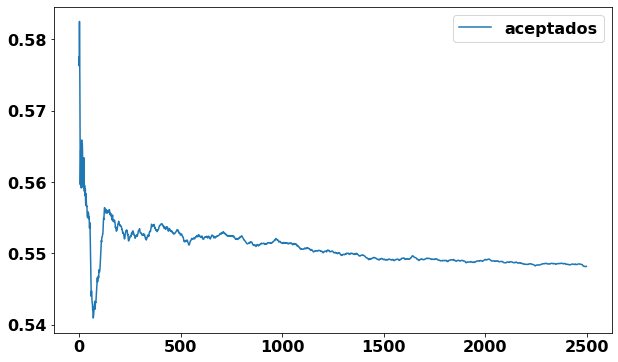

In [21]:
size = 20
temperature = 3.5
job = 1
output_file = f'{size}_size/{temperature:.3}_temp/{job:02}_JOB/output.dat'

run_data = pd.read_csv(output_file, sep='\s+' , names=['energia', 'magnetizacion', 'aceptados'])
run_data.head()

run_data.plot(y=['energia'], figsize=(10, 6))
run_data.plot(y=['magnetizacion'], figsize=(10, 6))
run_data.plot(y=['aceptados'], figsize=(10, 6))

In [22]:
data = data_raw.groupby(['size','temperature', 'B'], as_index=False).mean().drop('job', axis=1)


data['Cv'] = (data['energy^2']-data['energy']**2)/(data['temperature']**2)*data['N']
data['X'] = (data['magnetization^2']-data['amag']**2)*data['N']/data['temperature']
data['E'] = data['energy'] / data['N']
data['M'] = data['amag'] / data['N']



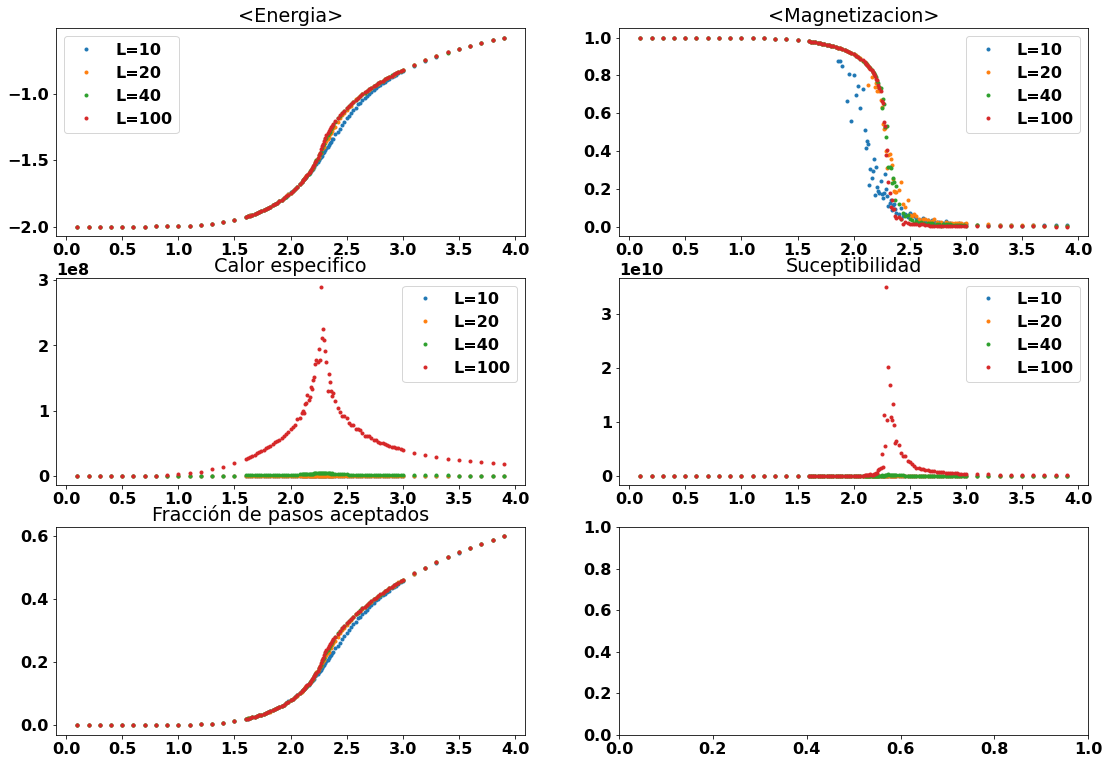

In [23]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2)
fig.set_size_inches(18.5, 13)
for s in data['size'].unique():
    dataf = data[(data['size']==s) & (data['B']==0.0)]
    
    plot(ax2, dataf['temperature'], dataf['M'], '<Magnetizacion>', label=f'L={s}')
    plot(ax1, dataf['temperature'], dataf['E'], '<Energia>', label=f'L={s}')
    plot(ax3, dataf['temperature'], dataf['Cv'], 'Calor especifico', label=f'L={s}', semilog=True)
    plot(ax4, dataf['temperature'], dataf['X'], 'Suceptibilidad', label=f'L={s}', semilog=True)
    plot(ax5, dataf['temperature'], dataf['aceptados'], 'Fracción de pasos aceptados', label=f'L={s}')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.show()